<a href="https://colab.research.google.com/github/componavt/sns4human/blob/main/src/vk/vk_group_members.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vk-api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.2 MB/s eta 0:00:00


In [15]:
import vk_api
from config import TOKEN
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_group_subscribers(owner_id, access_token):
    vk_session = vk_api.VkApi(token=access_token)
    vk = vk_session.get_api()

    subscribers = []
    offset = 0
    count = 1000

    while True:
        try:
            response = vk.groups.getMembers(group_id=owner_id, offset=offset, count=count)
            if not response['items']:
                break

            user_ids = response['items']
            users_info = vk.users.get(user_ids=user_ids, fields='city')

            for user in users_info:
                city = user.get('city', {}).get('title', 'Не указан')
                subscribers.append({
                    'id': user['id'],
                    'first_name': user['first_name'],
                    'last_name': user['last_name'],
                    'city': city
                })

            offset += count

        except vk_api.exceptions.VkApiError as e:
            print(f"Ошибка: {e}")
            break

    return subscribers

In [4]:
owner_id = 2975745
subscribers = get_group_subscribers(owner_id, TOKEN)

In [5]:
print(subscribers)

[{'id': 468689, 'first_name': 'Ekaterina', 'last_name': 'Terekhina', 'city': 'Lyon'}, {'id': 544360, 'first_name': 'Irina', 'last_name': 'Poliektova', 'city': 'Tegucigalpa'}, {'id': 671449, 'first_name': 'Alexey', 'last_name': 'Tsykarev', 'city': 'Petrozavodsk'}, {'id': 773377, 'first_name': 'Vladimir', 'last_name': 'Flavyanov', 'city': 'Saint Petersburg'}, {'id': 1239081, 'first_name': 'Nina', 'last_name': 'Zaytseva', 'city': 'Vologda'}, {'id': 1359539, 'first_name': 'Alexandra', 'last_name': 'Timoshilova', 'city': 'Moscow'}, {'id': 1540889, 'first_name': 'Svetlana', 'last_name': 'Alexeeva', 'city': 'Saint Petersburg'}, {'id': 1640466, 'first_name': 'Igor', 'last_name': 'Alexeev', 'city': 'Saint Petersburg'}, {'id': 2445152, 'first_name': 'Olga', 'last_name': 'Ignatenko', 'city': 'Petrozavodsk'}, {'id': 2595443, 'first_name': 'Veronika', 'last_name': 'Mikkonen', 'city': 'Не указан'}, {'id': 3119895, 'first_name': 'Olexandr', 'last_name': 'Baruev', 'city': 'Belomorsk'}, {'id': 3255351,

In [7]:
df = pd.DataFrame(subscribers)

In [8]:
df.head(10)

,id,first_name,last_name,city
0,468689,Ekaterina,Terekhina,Lyon
1,544360,Irina,Poliektova,Tegucigalpa
2,671449,Alexey,Tsykarev,Petrozavodsk
3,773377,Vladimir,Flavyanov,Saint Petersburg
4,1239081,Nina,Zaytseva,Vologda
5,1359539,Alexandra,Timoshilova,Moscow
6,1540889,Svetlana,Alexeeva,Saint Petersburg
7,1640466,Igor,Alexeev,Saint Petersburg
8,2445152,Olga,Ignatenko,Petrozavodsk
9,2595443,Veronika,Mikkonen,Не указан


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          121 non-null    int64 
 1   first_name  121 non-null    object
 2   last_name   121 non-null    object
 3   city        121 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.9+ KB


In [13]:
value_counts = df['city'].value_counts()
print(value_counts)

city
Petrozavodsk        33
Не указан           19
Saint Petersburg    18
Moscow              11
Kondopoga            3
Kostomuksha          3
Turku                2
Donetsk              1
Oulu                 1
Tyumen               1
Anapa                1
Kyiv                 1
Rostov-on-Don        1
Pyaozersky           1
Lyon                 1
Podolsk              1
Bolkhov              1
Helsinki             1
Québec               1
Taganrog             1
Kalevala             1
Ufa                  1
Vladikavkaz          1
Vyborg               1
Columbus             1
Arkhangelsk          1
Brest                1
Tegucigalpa          1
Novosibirsk          1
Aktau                1
Tikhvin              1
Ledmozero            1
Kazan                1
Tallinn              1
Kruševac             1
Dzerzhinsky          1
Belomorsk            1
Vologda              1
Alajärvi             1
Name: count, dtype: int64


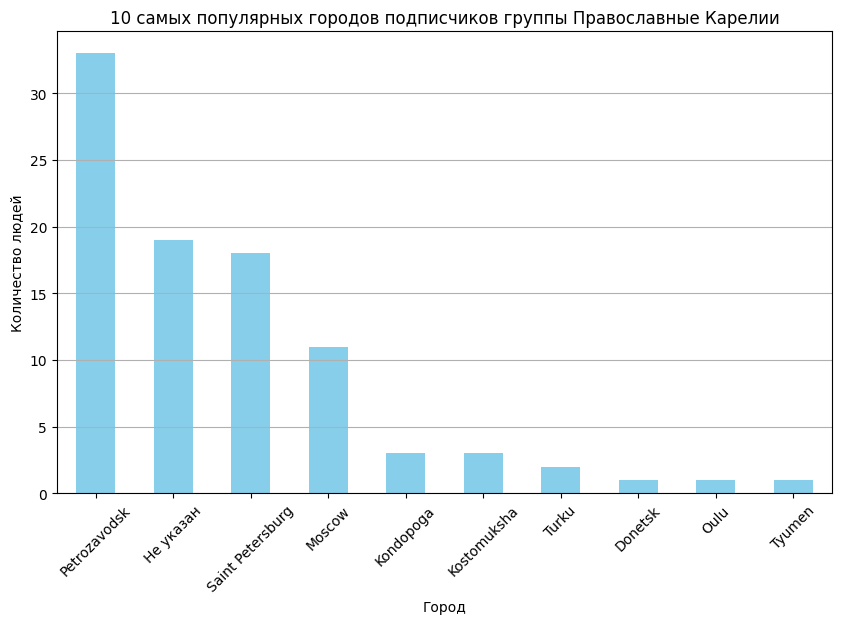

In [17]:
top_10_names = value_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_names.plot(kind='bar', color='skyblue')
plt.title('10 самых популярных городов подписчиков группы Православные Карелии')
plt.xlabel('Город')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()